# Stroke Prediction with Naive Bayes Classifier

### Developed by:
> Cicilia Widhi Astuti
>> 20/456362/TK/50492

> Hafizha Ulinnuha Ahmad 
>> 20/456365/TK/50495

> Michael Hamonangan Sitorus 
>>20/460552/TK/51141

> Azzahra Adine Divania 
>>20/463595/TK/51587

## Importing libraries/dependencies

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import math 
import random 
import csv 

## Data Preprocessing and Explanatory Data Analysis

In [3]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
poi = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
data = data[poi]
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [7]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

data.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 239.7 KB


In [9]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

data[column_numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035
std,22.612647,45.283560,7.699562
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [10]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


### Output Distribution - Pie Plot

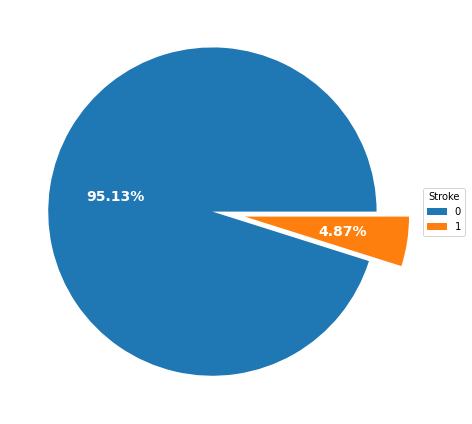

In [11]:
pie_data = data['stroke'].value_counts(normalize=True).values * 100
pie_label = data['stroke'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, startangle=0, explode=[0, 0.2],
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='Stroke',
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

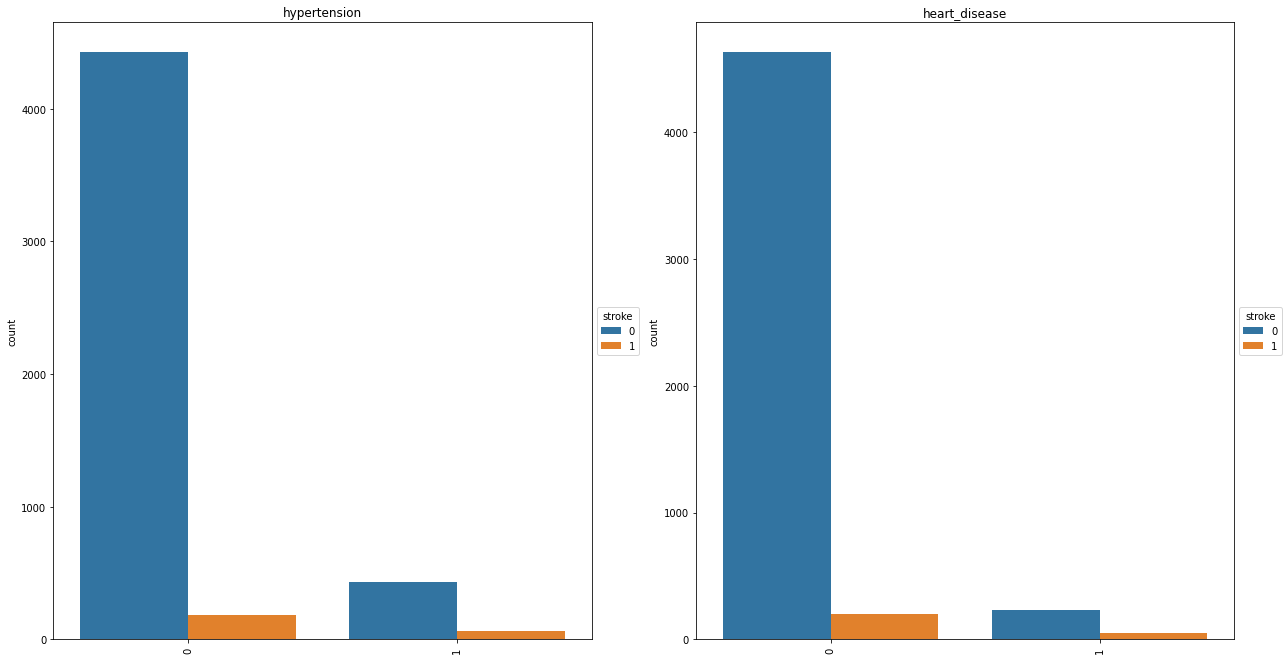

In [12]:
column_categorical = ['hypertension', 'heart_disease']

fig, ax = plt.subplots(2,2,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

### Numerical Data Distribution : Violin Plot

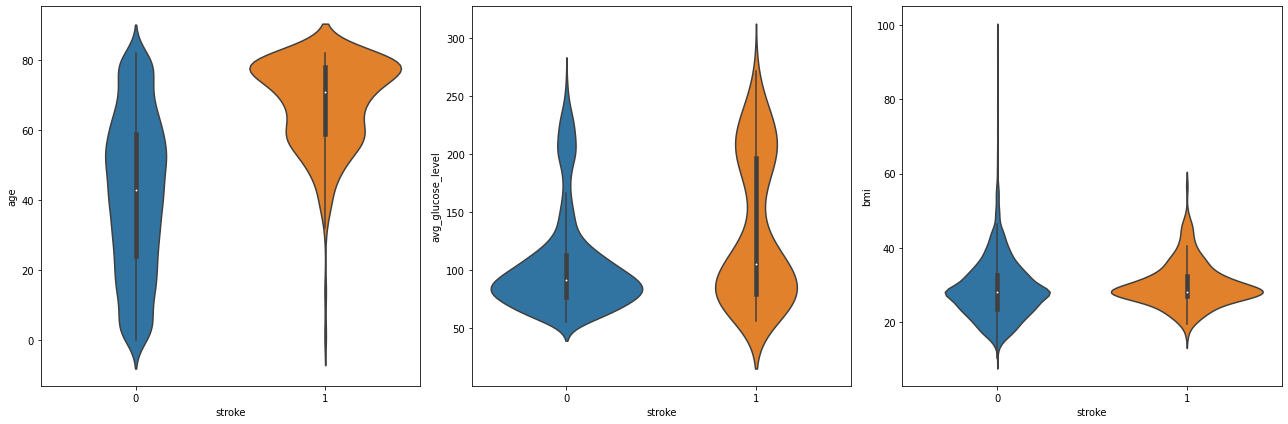

In [13]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.violinplot(data=data, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

### Numerical Data Distribution : Heatmap Correlation

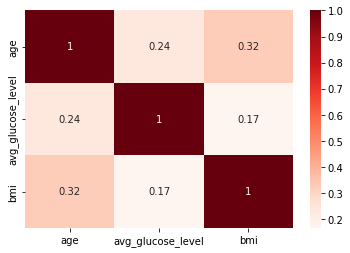

In [14]:
data[['age', 'avg_glucose_level', 'bmi']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age', 'avg_glucose_level', 'bmi']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [15]:
data.to_csv('preprocessed_stroke_data.csv', index=False)

## Modelling : Naive Bayes Classifier

In [16]:
def loadCsv(filename):
    lines = csv.reader(open(filename))
    dataset = list(lines)
    dataset.pop(0)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

In [17]:
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

In [18]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if vector[-1] not in separated:
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [19]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg, 2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [20]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

In [21]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [22]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-math.pow(x-mean, 2)/(2*math.pow(stdev, 2)))
    return exponent/(math.sqrt(2*math.pi)*stdev)

In [23]:
def calculateClassProbabilites(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

In [24]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilites(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [25]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [26]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))*100.0

In [28]:
def main():
    filename = 'preprocessed_stroke_data.csv'
    splitRatio = 0.67
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split {0} rows into train = {1} and test = {2} rows'.format(len(dataset), len(trainingSet), len(testSet)))
    summaries = summarizeByClass(trainingSet)
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: {0}%'.format(accuracy))
main()

Split 5110 rows into train = 3423 and test = 1687 rows
Accuracy: 80.67575577949022%


## Output Analysis

<p align="center"><em>--- end of the notebook ---</em></p>